# MGTF495 Data science for Python
     Sili Wei A53277099
     Yurou Zhao A53274346 
     Caizhang Yu A53289188
     Meng Lei A53290546
     Zhicheng Ma A53273737
     Everyone's nickname on Kaggle is the same as our real name
### Final RMSE  20850.249

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.model_selection import train_test_split

## Data Cleaning Part

### 1. We import the data first as the following steps:

In [2]:
data = pd.read_csv('train.csv')
X_test_raw = pd.read_csv('test.csv')
X_train_raw = data.iloc[:,0:79] 
y_train_raw = data.iloc[:,80]
X_combined_raw = X_train_raw.append(X_test_raw)

/Users/wesley/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [3]:
X_combined_raw.drop('ID', axis = 1, inplace = True)

### 2. After importing the data, we should clean it ( at this time, we cleaned the test data and training data together. After cleaning finished, then we split the total dataset into their original division). 
### Firstly, we try to clean the columns with too many missing values. The threshold was set to that if the missing value percentage is larger than the size percentage of test sample to total sample(test+train). This could prevent the fact that some features exist in the training set but not in the test set. Besides, the test sample is smaller, so it could also prevent the fact that the features existed in the test sample but not in the training set. After checking, we decided to delete the following columns (features).

In [4]:
column_dropped = []
for i in range(0,X_combined_raw.shape[1]):
    if (X_combined_raw .iloc[:,i].isna().sum()/X_combined_raw.shape[0])>=X_test_raw.shape[0]/(X_test_raw.shape[0]+X_train_raw.shape[0]):
        column_dropped.append(X_combined_raw.columns[i])
        print('The column to be deleted is '+ X_combined_raw.columns[i] + ' '+str(X_combined_raw.iloc[:,i].isna().sum()/X_combined_raw.shape[0]))
                        
X_combined_train_colcleaned= X_combined_raw.drop(column_dropped,axis =1)


The column to be deleted is 1stFloorArea 0.7
The column to be deleted is FenceQuality 0.8047781569965871
The column to be deleted is FireplaceQuality 0.4853242320819113
The column to be deleted is Misc Feature 0.9638225255972697
The column to be deleted is PoolQuality 0.9955631399317406
The column to be deleted is TypeOfAlleyAccess 0.9324232081911262


### Then we decided to check the rows to be deleted, if there are still too many missing values in each row, we should also delete them. But luckily, there is no row to be deleted.

In [5]:
row_to_be_deleted = []
for k in range(0,X_combined_train_colcleaned.shape[0]):
    if X_combined_train_colcleaned.iloc[i].isna().sum()>5:
        print('Row ' + str(i) + 'is to be deleted')
        row_to_be_deleted.append(i)

In [6]:
# No rows needed to be deleted

### 3. Now, for the rest remaining uncleaned features, we should clean them. First we check out the missing value NaN in which column.

In [7]:
X_combined_train_colcleaned.isna().sum()

2ndFloorArea              0
Bedrooms                  0
BsmtCondition            80
BsmtExposure             83
BsmtFinish1Area           1
BsmtFinish2Area           1
BsmtFinishType1          80
BsmtFinishType2          81
BsmtFullBaths             2
BsmtHalfBaths             2
BsmtHeight               80
BsmtUnfinishedArea        1
BuildingClass             0
Central Air               0
Electrical                1
EnclosedPorchArea         0
Exterior1                 0
Exterior2                 0
ExteriorCond              0
ExteriorQual              0
Fireplaces                0
Flatness                  0
Foundation                0
FullBaths                 0
Functional                0
GarageArea                1
GarageCars                1
GarageCondition         159
GarageFinish            159
GarageQuality           159
                       ... 
LowQualityFinishArea      0
MasVnrArea               23
MasVnrType               23
Misc                      0
MonthSold           

In [8]:
columns_tobe_interpolated = []
for p in range(0,len(X_combined_train_colcleaned.isna().sum())):
     if X_combined_train_colcleaned.isna().sum()[p]>0:
            columns_tobe_interpolated.append(X_combined_train_colcleaned.columns[p])
            print(X_combined_train_colcleaned.columns[p])

BsmtCondition
BsmtExposure
BsmtFinish1Area
BsmtFinish2Area
BsmtFinishType1
BsmtFinishType2
BsmtFullBaths
BsmtHalfBaths
BsmtHeight
BsmtUnfinishedArea
Electrical
GarageArea
GarageCars
GarageCondition
GarageFinish
GarageQuality
GarageType
GarageYearBuilt
LotFrontage
MasVnrArea
MasVnrType
TotalBsmtArea


### After figuring out which column need to be deleted, we should use different interpolation method, for floating type variables, we just use linear interpolation between two points. For string type variable, we interpolate them with two nearest  variables value.

In [9]:
for l in columns_tobe_interpolated:
    if type(X_combined_train_colcleaned[l].values[0]) == str:
        print(l)
        X_combined_train_colcleaned[l] =X_combined_train_colcleaned[l].interpolate(method='pad', limit=2)
    else:
        X_combined_train_colcleaned[l] = X_combined_train_colcleaned[l].interpolate(method='linear') # You can change the method here
          

BsmtCondition
BsmtExposure
BsmtFinishType1
BsmtFinishType2
BsmtHeight
Electrical
GarageCondition
GarageFinish
GarageQuality
GarageType
MasVnrType


### 4. Then we extend all the string variables into dummy variables by using the function get_dummites, the number of features increased from 80 to 279 because for some string variables, it includes multiple categories, for a string variable with N categories, at least we need n-1 dummy variables to represent each categories. The get_dummies function can help us finish this process easily.

In [10]:
X_combined_etd= pd.get_dummies(X_combined_train_colcleaned) # dummy variables are created now

### Then we splict out the test data and training data.

In [11]:
X_train_etd = X_combined_etd.iloc[0:2051,:]

In [12]:
X_test_etd = X_combined_etd.iloc[2051:,:]

In [13]:
# Data cleaning part is finished

### For training data, in order to find the best tuning parameter in our model, we divide it into new training data and validation set.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_train_etd, y_train_raw, test_size=1/4, shuffle=False)

## Model Selection and Parameter selection Part

### In this part, we decided to try different model such as LASSO, Elastic Net, Ridge regression, etc. Aftering finding the best tuning parameter for each model individually, then we try to find the best weighted average of the prediction among the model.

### 1. First we adjust the regulization parameter for LASSO model, then we check out the RMSE on the validation set of different alpha, from the figure we can see that when alpha =0.03, it has the best performance

In [16]:
from sklearn import linear_model

In [21]:
def lasso_mdl(X_v,y_v,X,y,h):
    clf_lasso = linear_model.Lasso(alpha=h, copy_X=True, fit_intercept=True, max_iter=10000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False)
    clf_lasso.fit(X,y)
    y_pred = clf_lasso.predict(X_v)
    return (((np.sum(y_v-y_pred))**2)/y_v.shape[0])**0.5

In [22]:
RMSE = []
for h in [0.01,0.03,0.1,0.3,1]:
    RMSE.append(lasso_mdl(X_val_t,y_val_t,X_train_t,y_train_t,h))
    

/Users/wesley/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0,0.5,'RMSE')

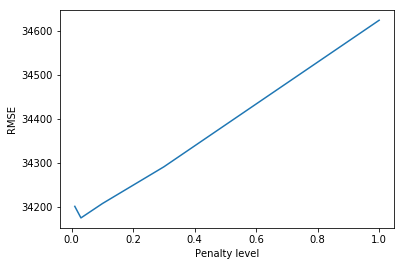

In [23]:
mp.plot([0.01,0.03,0.1,0.3,1],RMSE)
mp.xlabel('Penalty level')
mp.ylabel('RMSE')

In [24]:
# From the figure, we can see that we should choose alpha =0.03

In [25]:
clf_lasso = linear_model.Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
clf_lasso.fit(X_train_etd ,y_train_raw)

/Users/wesley/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
y_pred_lasso = clf_lasso.predict(X_test_etd)

### Then we test the Elastic Net model using the similar testing process

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [28]:
def Eln_mdl(X_v,y_v,X,y,h):
    clf_eln = linear_model.ElasticNet(alpha=h, copy_X=True, fit_intercept=True, l1_ratio=0.5,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
    clf_eln.fit(X,y)
    y_pred = clf_eln.predict(X_v)
    return (((np.sum(y_v-y_pred))**2)/y_v.shape[0])**0.5

In [32]:
RMSE_eln = []
for h in [0.01,0.03,0.1,0.3,1]:
    RMSE_eln.append(Eln_mdl(X_val_t,y_val_t,X_train_t,y_train_t,h))

/Users/wesley/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0,0.5,'RMSE')

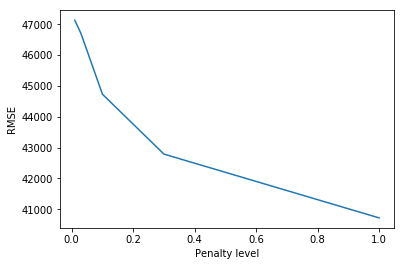

In [33]:
mp.plot([0.01,0.03,0.1,0.3,1],RMSE_eln)
mp.xlabel('Penalty level')
mp.ylabel('RMSE')

In [31]:
# alpha =0.3 in the elastic net is an enbow point

In [34]:
clf_eln = linear_model.ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.5,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
clf_eln.fit(X_train_etd ,y_train_raw)

/Users/wesley/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
y_pred_eln = clf_eln.predict(X_test_etd)

### Then we use the ridge model to predict sales price. 

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

Now take a look back again at the cost function for ridge regression.![title](image.png)
Here if you notice, we come across an extra term, which is known as the penalty term. λ given here, is actually denoted by alpha parameter in the ridge function. So by changing the values of alpha, we are basically controlling the penalty term. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced.

And the ridge model shrinks the parameters, therefore it is mostly used to prevent multicollinearity. It reduces the model complexity by coefficient shrinkage.

Then, we used Cross validation to tune our lamda. The Cross validation(CV) tries to avoid overfitting due to the use of the same data points to fit a model and evaluate its performance CV averages over all possible combinations of estimation and evaluation samples obtainable from a given data set.



K-Fold is a popular and easy to understand, it generally results in a less biased model compare to other methods. Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data. Here we used the function: sklearn.model_selection.cross_val_score.

![title](2.jpeg)

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

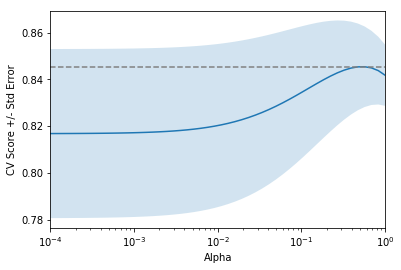

In [37]:
from sklearn.model_selection import cross_val_score
# Ridge Model
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_train_etd ,y_train_raw, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [38]:
index = ridge_scores.index(max(ridge_scores))
alpha_ridge = alpha_space[index]
alpha_ridge

0.5689866029018293

### Therefore, after cross_validation, we choose the alpha=0.5689866029018293. Then, we use the ridge regression with the tuned alpha.

In [39]:
clf_ridge = Ridge(alpha=alpha_ridge, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False,random_state=None, tol=0.0001,solver='auto')
clf_ridge.fit(X_train_etd ,y_train_raw)

Ridge(alpha=0.5689866029018293, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=False, random_state=None, solver='auto',
   tol=0.0001)

In [40]:
y_pred_ridge = clf_ridge.predict(X_test_etd)
Ridge_coef = clf_ridge.coef_
score_ridge = clf_ridge.score(X_train_etd ,y_train_raw)
score_ridge

0.920996611880977

## PCA model
Since from the results of feature engineering, we get more than 270 features, and comparing with the data sample, which is around 2000, too mang predictors could lead to multicollinearity. The PCA method could help with dimensionality reduction technique. In this step, we tried the PCA mathod of which the number of main components is from 1 to 200, and then use the linear regression model to predict the house price for the valication set. By evaluating the R^2 of the validation set, we obtain the number of the main components, which reaches the maximun R^2 in validation set.

In [41]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
PcaResults = np.zeros(200)
Comp =  np.zeros(200)
lrModel = LinearRegression()
for i in range(1,200):
    pca = PCA(n_components=i)
    data_transformed = pca.fit_transform( X_combined_etd )
    data_transformed = pd.DataFrame(data_transformed)
    X_train_pca = data_transformed.iloc[0:2051,:]
    X_train, X_val, y_train, y_val = train_test_split(X_train_pca, y_train_raw, test_size=0.2, random_state = 5)
    lrModel.fit(X_train,y_train)
    y_pred = lrModel.predict(X_val)
    PcaResults[i] = r2_score(y_val,y_pred)
    Comp[i] = i

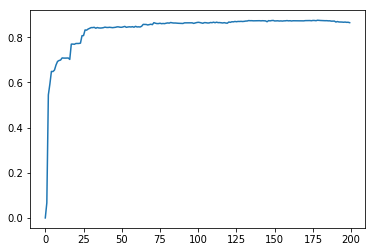

In [43]:
plt.figure()
plt.plot(Comp,PcaResults)

In [44]:
print('The maximum R^2 is ', str(np.max(PcaResults)),' when the numer of the components is ', str(np.argmax(PcaResults)))

The maximum R^2 is  0.8752894247349143  when the numer of the components is  178


In [45]:
pca = PCA(n_components= np.argmax(PcaResults))
data_transformed = pca.fit_transform(X_combined_etd)
data_transformed = pd.DataFrame(data_transformed)
X_train_pca = data_transformed.iloc[0:2051,:]
X_test_pca = data_transformed.iloc[2051:,:]
lrModel.fit(X_train_pca,y_train_raw)
y_pred_pca = lrModel.predict(X_test_pca)

## Final prediction
After getting the prediction from the 4 models, we just take the average of them. 

In [62]:
combined_y = 0.25*y_pred_eln+0.25*y_pred_pca+0.25*y_pred_lasso+0.25*y_pred_ridge

In [63]:
sub = pd.DataFrame()
sub['Id'] = X_test_raw['ID']
sub['SalePrice'] = combined_y
sub.to_csv('submission.csv',index=False)